In [1]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>{css}</style>"))

# فصل ۴ — مبانی یادگیری نظارت‌شده
## درس ۷: ترم‌های چندجمله‌ای و برهم‌کنش در مدل‌های رگرسیون


### اهداف یادگیری

در پایان این درس، شما می‌توانید:

- توضیح دهید **چرا** و **چه زمانی** ترم‌های چندجمله‌ای به رگرسیون خطی کمک می‌کنند تا غیرخطی‌بودن را مدل کند.
- **ویژگی‌های برهم‌کنش (Interaction)** بسازید و آن‌ها را درست تفسیر کنید (از جمله «اصل سلسله‌مراتبی»).
- پایپ‌لاین‌های **ایمن و بدون نشت اطلاعات** در scikit-learn بسازید که شامل `PolynomialFeatures`، مقیاس‌بندی، کُدگذاری و منظم‌سازی باشد.
- مدل‌های خطی پایه را با مدل‌های دارای چندجمله‌ای/برهم‌کنش با استفاده از **Train/Test** و **اعتبارسنجی متقاطع** مقایسه کنید.
- خطاهای رایج را تشخیص دهید: انفجار ویژگی، چندهمخطی، ریسک برون‌یابی و بیش‌برازش.

### ترم‌های چندجمله‌ای و برهم‌کنش دقیقاً چه مسئله‌ای را حل می‌کنند؟

رگرسیون خطی «در پارامترها خطی» است، نه لزوماً در ورودی‌های خام. اگر بردار ویژگی را طوری بسازیم که شامل تبدیل‌های غیرخطی از ورودی‌ها باشد، یک مدل خطی می‌تواند روابط غیرخطی را نمایش دهد.

یک مثال ساده:

- ویژگی خام: $x$
- ویژگی‌های گسترش‌یافته: $[x,\; x^2,\; x^3]$

در این صورت مدل:

$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3.
$$

این مدل «رگرسیون چندجمله‌ای» نام دارد، اما از نظر محاسباتی همچنان OLS روی یک فضای ویژگی بزرگ‌تر است.

**ترم‌های برهم‌کنش** زمانی لازم می‌شوند که «اثر یک متغیر به متغیر دیگر وابسته باشد». برای دو ویژگی $x_1$ و $x_2$:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12}(x_1 x_2).
$$

اگر $\beta_{12} \neq 0$ باشد، شیب $x_1$ به $x_2$ وابسته است (و برعکس).

### ایده کلیدی: نگاشت ویژگی و ماتریس طراحی

فرض کنید $\phi(\cdot)$ یک نگاشت ویژگی باشد. ما بردار ویژگی جدید را تعریف می‌کنیم:

$$
\mathbf{z} = \phi(\mathbf{x}).
$$

آن‌گاه رگرسیون خطی به شکل زیر نوشته می‌شود:

$$
\hat{y} = \mathbf{w}^\top \mathbf{z}.
$$

و در فرم ماتریسی با ماتریس طراحی $\mathbf{Z}$:

$$
\hat{\mathbf{y}} = \mathbf{Z}\mathbf{w}.
$$

ترم‌های چندجمله‌ای و برهم‌کنش روش‌هایی سیستماتیک برای تعریف $\phi(\cdot)$ هستند.

### چند ویژگی جدید با گسترش چندجمله‌ای ساخته می‌شود؟

اگر $p$ ویژگی عددی داشته باشید و همه ترم‌های چندجمله‌ای تا درجه $d$ (شامل برهم‌کنش‌ها) را بسازید، تعداد ویژگی‌ها به‌صورت ترکیبی رشد می‌کند.

یک فرمول شمارشی مفید (برای ویژگی‌های چندجمله‌ای «کامل» شامل بایاس) این است:

$$
\text{\#features} = \binom{p + d}{d}.
$$

اگر بایاس را حذف کنید، ۱ واحد کم می‌شود.

همین رشد ترکیبی دلیل این است که گسترش چندجمله‌ای معمولاً به موارد زیر نیاز دارد:

- **منظم‌سازی** (Ridge/Lasso/Elastic Net)،
- **انتخاب ویژگی** (یا محدودکردن گسترش به ورودی‌های منتخب)،
- **اعتبارسنجی دقیق**،
- و مقیاس‌بندی/مرکزبندی برای پایداری عددی.

### اصل سلسله‌مراتبی و تفسیرپذیری

یک راهنمای رایج در مدل‌سازی «اصل سلسله‌مراتبی» است:

- اگر برهم‌کنش $x_1 x_2$ را وارد می‌کنید، معمولاً باید اثرات اصلی $x_1$ و $x_2$ هم حضور داشته باشند.
- اگر $x^2$ را وارد می‌کنید، معمولاً $x$ هم باید باشد.

دلیل: حذف ترم‌های مرتبه پایین‌تر می‌تواند تفسیر و بهینه‌سازی را ناپایدار کند و محدودیت‌های عجیب ایجاد کند.

### مرکزکردن و مقیاس‌بندی (پایداری عددی)

ویژگی‌های چندجمله‌ای ممکن است بدشرط (ill-conditioned) شوند؛ زیرا توان‌هایی مانند $x^3$ بزرگ می‌شوند و مقیاس ترم‌ها متفاوت است. همچنین چندهمخطی بعد از گسترش معمولاً بدتر می‌شود.

الگوی عملی استاندارد:

1. استانداردسازی ویژگی‌های عددی (میانگین ۰ و واریانس ۱)،
2. ساخت ویژگی‌های چندجمله‌ای روی داده استانداردشده،
3. برازش یک مدل منظم‌سازی‌شده (Ridge معمولاً یک خط پایه بسیار خوب است)،
4. انتخاب درجه و شدت منظم‌سازی با CV.

### چه زمانی از چندجمله‌ای/برهم‌کنش استفاده کنیم؟

مناسب:

- وقتی شهود دامنه‌ای دارید که رابطه هموار و غیرخطی است.
- وقتی به یک مدل سبک، سریع و قابل توضیح نیاز دارید (نسبت به درخت‌ها/Boosting).
- وقتی می‌خواهید دقیقاً کنترل کنید چه نوع غیرخطی‌هایی مجاز است (مثلاً فقط درجه ۲).

نامناسب یا با احتیاط:

- وقتی ویژگی‌های عددی زیاد دارید و کنترل/منظم‌سازی کافی ندارید.
- وقتی برون‌یابی معتبر خارج از بازه داده آموزشی می‌خواهید (چندجمله‌ای‌ها می‌توانند «منفجر» شوند).
- وقتی داده کم است نسبت به تعداد ویژگی‌های مهندسی‌شده.

در عمل مدرن، ترم‌های چندجمله‌ای و برهم‌کنش هنوز مفیدند چون:

- خط‌پایه‌های قوی می‌سازند،
- ساختار تفسیرپذیر می‌دهند،
- و کمک می‌کنند بفهمیم آیا واقعاً به مدل «جعبه سیاه» نیاز داریم یا خیر.



---

## ۱) ترم‌های چندجمله‌ای: هندسه و شهود بایاس–واریانس

یک مدل خطی در $\mathbf{z}=\phi(\mathbf{x})$ می‌تواند الگوهای غیرخطی را در $x$ نمایش دهد.

- افزایش درجه $d$ معمولاً **انعطاف‌پذیری مدل** را افزایش می‌دهد (بایاس کمتر).
- اما **واریانس** را هم بالا می‌برد (ریسک بیش‌برازش)، به‌ویژه وقتی داده کم باشد.

به‌صورت شهودی:

- درجه ۱: خط راست
- درجه ۲: یک خم (سهمی)
- درجه ۳: دو خم، و الی آخر

قاعده عملی: درجه چندجمله‌ای را مثل یک ابرپارامتر با CV انتخاب کنید، نه صرفاً بر اساس سلیقه.

### منظم‌سازی همراه با ویژگی‌های چندجمله‌ای

Ridge مسئله زیر را حل می‌کند:

$$
\min_{\mathbf{w}} \; \|\mathbf{y}-\mathbf{Z}\mathbf{w}\|_2^2 + \lambda \|\mathbf{w}\|_2^2.
$$

Lasso از جریمه $L_1$ استفاده می‌کند:

$$
\min_{\mathbf{w}} \; \|\mathbf{y}-\mathbf{Z}\mathbf{w}\|_2^2 + \lambda \|\mathbf{w}\|_1.
$$

Elastic Net ترکیبی از هر دو است:

$$
\min_{\mathbf{w}} \; \|\mathbf{y}-\mathbf{Z}\mathbf{w}\|_2^2 + \lambda\left(\alpha \|\mathbf{w}\|_1 + (1-\alpha)\|\mathbf{w}\|_2^2\right).
$$

نکته مهم:

- در گسترش چندجمله‌ای، Ridge اغلب انتخاب امن‌تری نسبت به OLS است چون چندهمخطی بین توان‌ها و برهم‌کنش‌ها را پایدار می‌کند.
- Lasso برای پاسخ‌های تُنُک مفید است، اما زیر هم‌بستگی بالا می‌تواند ناپایدار باشد (که در چندجمله‌ای‌ها رایج است).

---

## ۲) برهم‌کنش: «اثر شرطی»

یک برهم‌کنش $x_1 x_2$ یعنی «اثر حاشیه‌ای $x_1$ با تغییر $x_2$ تغییر می‌کند»:

$$
\frac{\partial \hat{y}}{\partial x_1} = \beta_1 + \beta_{12} x_2.
$$

پس شیب نسبت به $x_1$ ثابت نیست؛ به $x_2$ وابسته است.

### برهم‌کنش عددی × دسته‌ای

اگر یک ویژگی دسته‌ای $c$ را one-hot کنیم، برهم‌کنش بین یک ویژگی عددی $x$ و اندیکاتورهای دسته‌ها، شیب‌های متفاوت برای هر دسته ایجاد می‌کند.
این یک الگوی رایج و تفسیرپذیر است، مثلاً:

- محله‌های مختلف ممکن است شیب متفاوت «قیمت به ازای متراژ» داشته باشند.
- نوع برش الماس ممکن است رابطه carat و price را تغییر دهد.

---

## ۳) گردش‌کار عملی در scikit-learn

ساختار پیشنهادی:

1. جداسازی داده (`train_test_split`).
2. پیش‌پردازش:
   - عددی: `StandardScaler()` سپس `PolynomialFeatures(...)`
   - دسته‌ای: `OneHotEncoder(handle_unknown="ignore")`
3. مدل: Ridge / Lasso / ElasticNet.
4. ارزیابی با train/test و CV (GridSearchCV).

در این درس سه مرحله اجرا می‌کنیم:

- یک مثال مصنوعی (تا الگوی «واقعی» را بدانیم).
- یک دیتاست کوچک‌تر (`house-prices.csv`) برای شهود و رسم نمودار.
- یک دیتاست غنی‌تر (`diamonds.csv`) برای نمایش برهم‌کنش با ویژگی‌های دسته‌ای و منظم‌سازی قوی‌تر.

همه مسیرها مطابق ساختار ریپو هستند، مثل:

- `../../../Datasets/Regression/house-prices.csv`
- `../../../Datasets/Regression/diamonds.csv`



---

## ۳.۵) نگاه عمیق‌تر: `PolynomialFeatures` دقیقاً چه می‌سازد؟

برای بردار ورودی $\mathbf{x} = [x_1, x_2, \dots, x_p]$، گسترش **درجه ۲** شامل موارد زیر است:

- همه اثرات اصلی: $x_1, x_2, \dots, x_p$
- همه توان‌های دوم: $x_1^2, x_2^2, \dots, x_p^2$
- همه برهم‌کنش‌های دوتایی: $x_1 x_2, x_1 x_3, \dots$

مثلاً برای $p=2$ (ویژگی‌های $x_1$ و $x_2$)، درجه ۲ تولید می‌کند:

$$
[1,\; x_1,\; x_2,\; x_1^2,\; x_1 x_2,\; x_2^2].
$$

در scikit-learn:

- `include_bias=True` ستون ثابت $1$ را اضافه می‌کند.
- `interaction_only=True` توان‌های خالص مثل $x_1^2$ را حذف می‌کند و فقط ضرب بین ویژگی‌های متفاوت را نگه می‌دارد
  (مثلاً $x_1 x_2$ را نگه می‌دارد ولی $x_1^2$ را نه).

### نکته تفسیر

وقتی ترم‌های چندجمله‌ای و برهم‌کنش وارد می‌کنید، **تفسیر تک‌ضریب‌ها** دشوار می‌شود چون:

- ویژگی‌ها هم‌بسته‌اند،
- مقیاس‌بندی اندازه ضرایب را تغییر می‌دهد،
- منظم‌سازی ضرایب را به‌صورت مشترک کوچک می‌کند.

رویکرد عملی برای تفسیر:

- روی **منحنی‌های حاشیه‌ای** تمرکز کنید،
- برای برهم‌کنش‌ها، پیش‌بینی را در مقادیر ثابت مختلف ویژگی دوم مقایسه کنید،
- از نمودارهای ساده استفاده کنید.

### ارتباط با کرنل‌ها و مدل‌های مدرن

گسترش چندجمله‌ای پل کلاسیک به روش‌های کرنلی است.
از طرف دیگر، Boosting و Random Forest غیرخطی‌ها را خودکار مدل می‌کنند.
با این حال، چندجمله‌ای/برهم‌کنش وقتی مفیدند که به مدل سبک و تفسیرپذیر نیاز دارید یا می‌خواهید یک خط‌پایه قابل توضیح بسازید.



---

## ۳.۶) تعداد ویژگی و «سقوط ترکیبی»

فرمول تعداد ویژگی فقط تئوری نیست؛ پیامد مهندسی مستقیم دارد.

اگر:

- $p=4$ ویژگی عددی،
- درجه $d=2$،

تعداد ویژگی‌های چندجمله‌ای (با احتساب بایاس) می‌شود:

$$
\binom{p+d}{d} = \binom{6}{2} = 15.
$$

اما برای $p=20$ و $d=3$:

$$
\binom{23}{3} = 1771,
$$

و این فقط بخش عددی است (قبل از one-hot و برهم‌کنش‌های احتمالی).

**قاعده تجربی:** اگر تعداد ویژگی‌های گسترش‌یافته نزدیک به تعداد نمونه‌های آموزشی شود (یا از آن بیشتر شود)، بدون منظم‌سازی قوی احتمال بیش‌برازش بالاست.

در سلول بعد چند جفت $(p,d)$ را محاسبه می‌کنیم تا شهود بسازید.


---
## آماده‌سازی محیط

سلول‌های بعدی را اجرا کنید تا کتابخانه‌ها ایمپورت شوند و توابع کمکی ساخته شوند.

In [2]:
import math

def n_poly_features(p, d, include_bias=True):
    # Count of monomials of total degree <= d in p variables
    # = C(p+d, d). If excluding bias, subtract 1.
    n = math.comb(p + d, d)
    return n if include_bias else (n - 1)

for p, d in [(1, 3), (2, 2), (4, 2), (10, 3), (20, 3), (30, 2)]:
    print(f"p={p:2d}, d={d}: features (incl bias) = {n_poly_features(p, d, True):6d} | (no bias) = {n_poly_features(p, d, False):6d}")


p= 1, d=3: features (incl bias) =      4 | (no bias) =      3
p= 2, d=2: features (incl bias) =      6 | (no bias) =      5
p= 4, d=2: features (incl bias) =     15 | (no bias) =     14
p=10, d=3: features (incl bias) =    286 | (no bias) =    285
p=20, d=3: features (incl bias) =   1771 | (no bias) =   1770
p=30, d=2: features (incl bias) =    496 | (no bias) =    495



---

## ۳.۷) مثال مصنوعی: تفکیک انحنا از برهم‌کنش

قبل از ورود به دیتاست‌های واقعی، یک دیتاست مصنوعی می‌سازیم که در آن فرآیند تولید داده را می‌دانیم.

می‌خواهیم:

- یک رابطه **خمیده** در ویژگی $x$ با ترم درجه دو داشته باشیم.
- یک **برهم‌کنش** بین $x_1$ و $x_2$ با ضرب $x_1 x_2$ داشته باشیم.

یک نمونه فرآیند تولید:

$$
y = 3 + 2x - 0.7x^2 + 4(x_1 x_2) + \epsilon,
$$

که $\epsilon$ نویز گاوسی است.

سه مدل می‌سازیم:

1. مدل خطی پایه بدون چندجمله‌ای/برهم‌کنش،
2. مدل با ترم درجه دو روی $x$ (برای انحنا)،
3. مدل با `PolynomialFeatures(degree=2)` روی $[x_1,x_2]$ (برای ترم $x_1 x_2$).

این کار نشان می‌دهد هر مرحله چه چیزی را به مدل اضافه می‌کند.


In [3]:
# Core imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Ready.")


Ready.


In [4]:
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def regression_report(y_true, y_pred, label=""):
    out = {
        "label": label,
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": rmse(y_true, y_pred),
        "R2": float(r2_score(y_true, y_pred)),
    }
    return out

def try_read_csv(path):
    try:
        df = pd.read_csv(path)
        print(f"Loaded: {path} | shape={df.shape}")
        return df
    except FileNotFoundError:
        print(f"File not found: {path}")
        print("Make sure you placed the dataset in the expected repository path.")
        return None


In [5]:
# Synthetic data
from sklearn.pipeline import make_pipeline

n = 400
rng = np.random.default_rng(RANDOM_STATE)

x = rng.uniform(-3, 3, size=n)
x1 = rng.normal(0, 1, size=n)
x2 = rng.normal(0, 1, size=n)

noise = rng.normal(0, 1.0, size=n)

y = 3 + 2*x - 0.7*(x**2) + 4*(x1*x2) + noise

df_syn = pd.DataFrame({"x": x, "x1": x1, "x2": x2, "y": y})
df_syn.head()


,x,x1,x2,y
0,1.643736,0.439637,0.044212,4.157716
1,-0.366729,0.524188,-0.202914,2.112302
2,2.151588,0.276274,-1.082427,3.479423
3,1.184208,-1.412766,-0.151052,5.099388
4,-2.434936,-2.310103,-0.746098,2.405925


In [6]:
X = df_syn[["x", "x1", "x2"]]
y = df_syn["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE
)

# 1) Baseline linear
m_lin = make_pipeline(StandardScaler(), LinearRegression())
m_lin.fit(X_train, y_train)

# 2) Curvature only: polynomial on x (and keep x1, x2 linear)
# We'll implement this by building poly features for x and concatenating with scaled x1,x2.
from sklearn.compose import ColumnTransformer

pre_curv = ColumnTransformer(
    transformers=[
        ("x_poly", Pipeline([("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2, include_bias=False))]), ["x"]),
        ("rest", StandardScaler(), ["x1", "x2"]),
    ],
    remainder="drop",
)
m_curv = Pipeline([("pre", pre_curv), ("model", Ridge(alpha=1.0))])
m_curv.fit(X_train, y_train)

# 3) Interaction model: degree-2 polynomial on x1,x2 to capture x1*x2 (keep x linear)
pre_inter = ColumnTransformer(
    transformers=[
        ("x", StandardScaler(), ["x"]),
        ("x1x2_poly", Pipeline([("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2, include_bias=False))]), ["x1", "x2"]),
    ],
    remainder="drop",
)
m_inter = Pipeline([("pre", pre_inter), ("model", Ridge(alpha=1.0))])
m_inter.fit(X_train, y_train)

pred_lin = m_lin.predict(X_test)
pred_curv = m_curv.predict(X_test)
pred_inter = m_inter.predict(X_test)

print(regression_report(y_test, pred_lin, "Synthetic: baseline linear"))
print(regression_report(y_test, pred_curv, "Synthetic: curvature on x (deg2)"))
print(regression_report(y_test, pred_inter, "Synthetic: interactions on x1,x2 (deg2)"))


{'label': 'Synthetic: baseline linear', 'MAE': 2.6578240089235448, 'RMSE': 3.7193552265678194, 'R2': 0.3957887503777432}
{'label': 'Synthetic: curvature on x (deg2)', 'MAE': 2.2157876482951284, 'RMSE': 3.1208657014309815, 'R2': 0.5745939616629886}
{'label': 'Synthetic: interactions on x1,x2 (deg2)', 'MAE': 1.6873341827173503, 'RMSE': 2.063376365838389, 'R2': 0.8140439155119626}


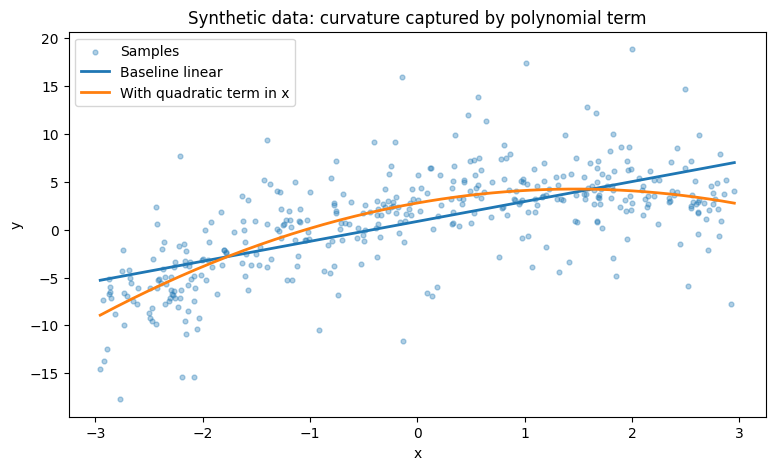

In [7]:
# Plot curvature in x by holding x1,x2 near 0 (approximately)
# We'll use a grid in x and set x1=x2=0 for visualization.
x_grid = np.linspace(df_syn["x"].min(), df_syn["x"].max(), 200)

X_grid = pd.DataFrame({"x": x_grid, "x1": np.zeros_like(x_grid), "x2": np.zeros_like(x_grid)})

y_hat_lin = m_lin.predict(X_grid)
y_hat_curv = m_curv.predict(X_grid)

plt.figure(figsize=(9, 5))
plt.scatter(df_syn["x"], df_syn["y"], s=12, alpha=0.35, label="Samples")
plt.plot(x_grid, y_hat_lin, linewidth=2, label="Baseline linear")
plt.plot(x_grid, y_hat_curv, linewidth=2, label="With quadratic term in x")
plt.title("Synthetic data: curvature captured by polynomial term")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



---

## ۴) مطالعه موردی A — قیمت خانه: ترم‌های چندجمله‌ای و یک برهم‌کنش هدفمند

از دیتاست زیر استفاده می‌کنیم:

- `../../../Datasets/Regression/house-prices.csv`

### گام A1 — بارگذاری و مشاهده


In [8]:
house_path = "../../../Datasets/Regression/house-prices.csv"
df_house = try_read_csv(house_path)
df_house.head() if df_house is not None else None


Loaded: ../../../Datasets/Regression/house-prices.csv | shape=(128, 8)


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [9]:
if df_house is not None:
    df_house = df_house.copy()
    target = "Price"
    df_house = df_house.dropna(subset=[target])
    print(df_house.dtypes)


Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object


In [10]:
if df_house is not None:
    X = df_house.drop(columns=["Price"])
    y = df_house["Price"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    numeric_features = ["SqFt", "Bedrooms", "Bathrooms", "Offers"]
    categorical_features = ["Brick", "Neighborhood"]

    baseline_preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ],
        remainder="drop",
    )

    baseline_model = Pipeline(
        steps=[
            ("preprocess", baseline_preprocess),
            ("model", LinearRegression()),
        ]
    )

    baseline_model.fit(X_train, y_train)
    pred = baseline_model.predict(X_test)
    regression_report(y_test, pred, label="Baseline linear (scaled numeric + one-hot cat)")


In [11]:
if df_house is not None:
    poly_num = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ]
    )

    poly_preprocess = ColumnTransformer(
        transformers=[
            ("num", poly_num, numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ],
        remainder="drop",
    )

    poly_model = Pipeline(
        steps=[
            ("preprocess", poly_preprocess),
            ("model", Ridge(alpha=1.0)),
        ]
    )

    poly_model.fit(X_train, y_train)
    pred_poly = poly_model.predict(X_test)
    regression_report(y_test, pred_poly, label="Degree-2 poly on numeric + one-hot cat + Ridge")


In [12]:
if df_house is not None:
    try:
        fn = poly_model.named_steps["preprocess"].get_feature_names_out()
        print("Number of transformed features:", len(fn))
        print("First 25 feature names:")
        print(fn[:25])
    except Exception as e:
        print("Could not extract feature names in this sklearn version.")
        print("Error:", repr(e))


Number of transformed features: 19
First 25 feature names:
['num__SqFt' 'num__Bedrooms' 'num__Bathrooms' 'num__Offers' 'num__SqFt^2'
 'num__SqFt Bedrooms' 'num__SqFt Bathrooms' 'num__SqFt Offers'
 'num__Bedrooms^2' 'num__Bedrooms Bathrooms' 'num__Bedrooms Offers'
 'num__Bathrooms^2' 'num__Bathrooms Offers' 'num__Offers^2'
 'cat__Brick_No' 'cat__Brick_Yes' 'cat__Neighborhood_East'
 'cat__Neighborhood_North' 'cat__Neighborhood_West']


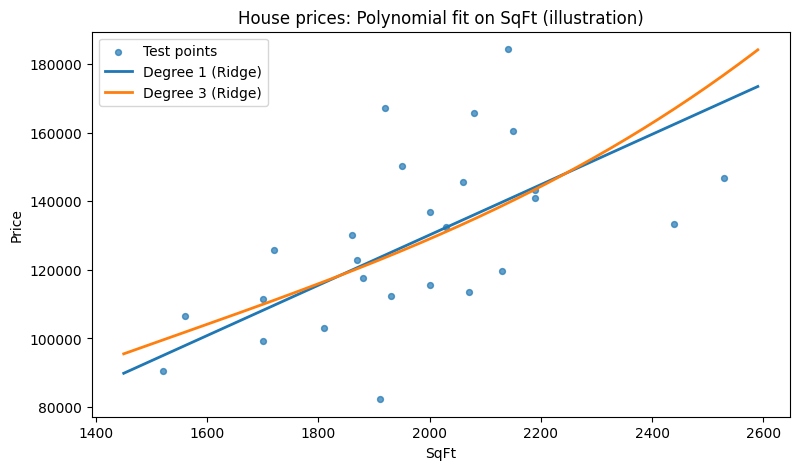

{'label': 'SqFt-only Degree1', 'MAE': 15910.715158326884, 'RMSE': 20361.44723145842, 'R2': 0.29659091657795766}
{'label': 'SqFt-only Degree3', 'MAE': 16460.580125465654, 'RMSE': 21148.692644139115, 'R2': 0.2411468570086026}


In [13]:
if df_house is not None:
    from sklearn.pipeline import make_pipeline

    X1 = df_house[["SqFt"]].values
    y1 = df_house["Price"].values

    X1_train, X1_test, y1_train, y1_test = train_test_split(
        X1, y1, test_size=0.2, random_state=RANDOM_STATE
    )

    model_deg1 = make_pipeline(StandardScaler(), PolynomialFeatures(1, include_bias=False), Ridge(alpha=1.0))
    model_deg3 = make_pipeline(StandardScaler(), PolynomialFeatures(3, include_bias=False), Ridge(alpha=1.0))

    model_deg1.fit(X1_train, y1_train)
    model_deg3.fit(X1_train, y1_train)

    x_grid = np.linspace(X1.min(), X1.max(), 200).reshape(-1, 1)
    y_hat1 = model_deg1.predict(x_grid)
    y_hat3 = model_deg3.predict(x_grid)

    plt.figure(figsize=(9, 5))
    plt.scatter(X1_test, y1_test, s=18, alpha=0.7, label="Test points")
    plt.plot(x_grid, y_hat1, linewidth=2, label="Degree 1 (Ridge)")
    plt.plot(x_grid, y_hat3, linewidth=2, label="Degree 3 (Ridge)")
    plt.title("House prices: Polynomial fit on SqFt (illustration)")
    plt.xlabel("SqFt")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

    print(regression_report(y1_test, model_deg1.predict(X1_test), label="SqFt-only Degree1"))
    print(regression_report(y1_test, model_deg3.predict(X1_test), label="SqFt-only Degree3"))



### گام A2 — یک برهم‌کنش هدفمند: `SqFt × Brick`

در بسیاری از مسائل، به‌جای گسترش کامل، یک یا دو برهم‌کنش معنادار کافی است.
در این‌جا فرض می‌کنیم خانه‌های آجری شیب متفاوتی نسبت به `SqFt` دارند و ترم `SqFt_x_Brick` را صریح می‌سازیم.


In [14]:
if df_house is not None:
    df_tmp = df_house.copy()

    brick_col = "Brick"
    if df_tmp[brick_col].dtype == object:
        df_tmp["Brick_bin"] = (df_tmp[brick_col].str.lower() == "yes").astype(int)
    else:
        df_tmp["Brick_bin"] = df_tmp[brick_col].astype(int)

    df_tmp["SqFt_x_Brick"] = df_tmp["SqFt"] * df_tmp["Brick_bin"]

    X = df_tmp[["SqFt", "Bedrooms", "Bathrooms", "Offers", "Brick_bin", "SqFt_x_Brick"]]
    y = df_tmp["Price"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    model = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("lin", LinearRegression()),
        ]
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    regression_report(y_test, pred, label="Manual interaction SqFt×Brick (scaled) + LinearRegression")



### گام A3 — انتخاب درجه و شدت منظم‌سازی با اعتبارسنجی متقاطع

درجه چندجمله‌ای و `alpha` ابرپارامتر هستند و باید با CV انتخاب شوند، نه با نگاه به تست.


In [15]:
if df_house is not None:
    X = df_house.drop(columns=["Price"])
    y = df_house["Price"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    poly_num = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(include_bias=False)),
        ]
    )

    preprocess = ColumnTransformer(
        transformers=[
            ("num", poly_num, numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ],
        remainder="drop",
    )

    pipe = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("model", Ridge()),
        ]
    )

    param_grid = {
        "preprocess__num__poly__degree": [1, 2, 3],
        "model__alpha": [0.1, 1.0, 10.0, 100.0],
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    gs = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring="neg_root_mean_squared_error",
        cv=cv,
        n_jobs=None
    )
    gs.fit(X_train, y_train)

    print("Best params:", gs.best_params_)
    print("Best CV RMSE:", -gs.best_score_)

    best_model = gs.best_estimator_
    pred = best_model.predict(X_test)
    print(regression_report(y_test, pred, label="Best polynomial+Ridge via CV"))


Best params: {'model__alpha': 0.1, 'preprocess__num__poly__degree': 1}
Best CV RMSE: 10222.615252384388
{'label': 'Best polynomial+Ridge via CV', 'MAE': 8899.551955905123, 'RMSE': 10680.473145336882, 'R2': 0.8064595837545716}



---

## ۴.۵) مقایسه Ridge و Lasso بعد از گسترش ویژگی (اختیاری)

بعد از گسترش چندجمله‌ای، ویژگی‌ها زیاد و هم‌بسته می‌شوند.

- **Ridge** معمولاً پایدارتر است و بسیاری از ضرایب را کوچک نگه می‌دارد.
- **Lasso** می‌تواند ضرایب زیادی را صفر کند (تفسیرپذیری)، اما با هم‌بستگی بالا ممکن است ناپایدار شود.

در سلول بعد، روی تنظیمات مشابه، Ridge و Lasso را مقایسه می‌کنیم.


In [16]:
if df_house is not None:
    X = df_house.drop(columns=["Price"])
    y = df_house["Price"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    poly_num = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ]
    )

    preprocess = ColumnTransformer(
        transformers=[
            ("num", poly_num, ["SqFt", "Bedrooms", "Bathrooms", "Offers"]),
            ("cat", OneHotEncoder(handle_unknown="ignore"), ["Brick", "Neighborhood"]),
        ],
        remainder="drop",
    )

    ridge = Pipeline([("preprocess", preprocess), ("model", Ridge(alpha=1.0))])
    lasso = Pipeline([("preprocess", preprocess), ("model", Lasso(alpha=0.01, max_iter=10000))])

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    pred_r = ridge.predict(X_test)
    pred_l = lasso.predict(X_test)

    print(regression_report(y_test, pred_r, "House: poly deg2 + Ridge"))
    print(regression_report(y_test, pred_l, "House: poly deg2 + Lasso(alpha=0.01)"))


{'label': 'House: poly deg2 + Ridge', 'MAE': 8727.782246947736, 'RMSE': 10869.003733304264, 'R2': 0.7995665684951624}
{'label': 'House: poly deg2 + Lasso(alpha=0.01)', 'MAE': 8721.345531706593, 'RMSE': 10897.598781530436, 'R2': 0.7985105484404432}



---

## ۵) مطالعه موردی B — الماس: برهم‌کنش با ویژگی‌های دسته‌ای

از دیتاست زیر استفاده می‌کنیم:

- `../../../Datasets/Regression/diamonds.csv`

### گام B1 — بارگذاری و مشاهده


In [17]:
diamonds_path = "../../../Datasets/Regression/diamonds.csv"
df_diamonds = try_read_csv(diamonds_path)
df_diamonds.head() if df_diamonds is not None else None


Loaded: ../../../Datasets/Regression/diamonds.csv | shape=(53940, 11)


,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
if df_diamonds is not None:
    df_diamonds = df_diamonds.copy()

    for col in ["id", "ID", "Id"]:
        if col in df_diamonds.columns:
            df_diamonds = df_diamonds.drop(columns=[col])

    target = "price"
    df_diamonds = df_diamonds.dropna(subset=[target])

    if len(df_diamonds) > 20000:
        df_diamonds = df_diamonds.sample(20000, random_state=RANDOM_STATE)

    print(df_diamonds.shape)
    print(df_diamonds.dtypes.head(20))


(20000, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [19]:
if df_diamonds is not None:
    X = df_diamonds.drop(columns=["price"])
    y = df_diamonds["price"]

    numeric_features = [c for c in X.columns if X[c].dtype != object]
    categorical_features = [c for c in X.columns if X[c].dtype == object]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    num_pipe = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ]
    )

    preprocess = ColumnTransformer(
        transformers=[
            ("num", num_pipe, numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ],
        remainder="drop",
    )

    model = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("model", Ridge(alpha=10.0)),
        ]
    )

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    regression_report(y_test, pred, label="Diamonds: Degree-2 poly numeric + one-hot cat + Ridge(alpha=10)")



### گام B2 — صریح‌تر کردن برهم‌کنش‌ها

اگر `PolynomialFeatures` فقط روی عددی اعمال شود، برهم‌کنش‌های عددی×دسته‌ای ساخته نمی‌شود.
برای ساخت این نوع برهم‌کنش‌ها، می‌توان بعد از one-hot روی کل فضا (با احتیاط) `PolynomialFeatures` را اعمال کرد.


In [20]:
if df_diamonds is not None:
    X = df_diamonds.drop(columns=["price"])
    y = df_diamonds["price"]

    numeric_features = [c for c in X.columns if X[c].dtype != object]
    categorical_features = [c for c in X.columns if X[c].dtype == object]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ],
        remainder="drop",
        sparse_threshold=0.3,
    )

    pipe = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("model", Ridge(alpha=50.0)),
        ]
    )

    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print(regression_report(y_test, pred, label="Diamonds: poly on (scaled numeric + one-hot cat) + Ridge(alpha=50)"))

    try:
        Z = pipe.named_steps["poly"].fit_transform(preprocess.fit_transform(X_train))
        print("Transformed feature matrix shape (train):", Z.shape)
    except Exception as e:
        print("Could not compute transformed matrix shape in this environment:", repr(e))


{'label': 'Diamonds: poly on (scaled numeric + one-hot cat) + Ridge(alpha=50)', 'MAE': 406.8338485660454, 'RMSE': 704.6387381302804, 'R2': 0.9689320554443055}
Transformed feature matrix shape (train): (16000, 377)



---

## ۶) اختیاری: نوشتار فرمولی statsmodels

در ادامه یک مثال فرمولی می‌آوریم (در صورت نصب بودن `statsmodels`) تا نحو ترم‌های $x^2$ و برهم‌کنش‌ها را ببینید.


In [21]:
# Optional cell: statsmodels may not be installed in all minimal environments.
# If it is installed, this provides a very interpretable coefficient table.

try:
    import statsmodels.formula.api as smf

    if df_diamonds is not None:
        cols = ["price", "carat", "depth", "table", "cut"]
        tmp = df_diamonds[cols].dropna().copy()

        # Example model: carat, carat^2, and carat×cut interaction
        formula = "price ~ carat + I(carat**2) + depth + table + carat:C(cut)"
        m = smf.ols(formula=formula, data=tmp).fit()

        print(m.summary().tables[1])
except Exception as e:
    print("Statsmodels formula demo not available:", repr(e))


                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3420.3467    710.473      4.814      0.000    2027.761    4812.932
carat                      5000.9380     95.979     52.104      0.000    4812.811    5189.065
carat:C(cut)[T.Good]       1080.1039     66.146     16.329      0.000     950.453    1209.755
carat:C(cut)[T.Ideal]      1814.1524     63.739     28.462      0.000    1689.219    1939.086
carat:C(cut)[T.Premium]    1419.1060     61.198     23.189      0.000    1299.152    1539.060
carat:C(cut)[T.Very Good]  1509.8593     61.859     24.408      0.000    1388.610    1631.109
I(carat ** 2)               640.1326     33.934     18.864      0.000     573.619     706.647
depth                       -61.6696      8.383     -7.357      0.000     -78.100     -45.239
table                       -24.7428      5.780     -4.281  


---

## ۷) خطاهای رایج و گاردریل‌های عملی

### خطای ۱ — انفجار ویژگی
با افزایش $p$ و $d$، تعداد ویژگی‌ها سریع رشد می‌کند؛ بنابراین درجه را محدود کنید و از منظم‌سازی استفاده کنید.

### خطای ۲ — چندهمخطی
توان‌ها و ضرب‌ها هم‌بسته‌اند؛ Ridge معمولاً پایدارتر است.

### خطای ۳ — برون‌یابی
چندجمله‌ای‌ها خارج از بازه داده می‌توانند رفتار نامعقول داشته باشند؛ حتماً نمودارها را بررسی کنید.

### خطای ۴ — نشت اطلاعات
پیش‌پردازش باید داخل `Pipeline` باشد.

### خطای ۵ — انتخاب درجه با تست
درجه را با CV انتخاب کنید.

---

## ۸) تمرین‌ها

۱. درجه ۱ تا ۴ را روی `house-prices.csv` با Ridge مقایسه کنید و نمودار RMSE را رسم کنید.  
۲. `interaction_only=True` را امتحان کنید و با حالت کامل درجه ۲ مقایسه کنید.  
۳. یک برهم‌کنش جدید بسازید (مثلاً `Bedrooms × Neighborhood`) و تاثیر آن را بررسی کنید.  
۴. OLS درجه ۳ را فیت کنید و پایداری را با Ridge مقایسه کنید.  
۵. تعداد ویژگی‌ها را برای دو حالت (فقط عددی) و (عدد + one-hot) در diamonds گزارش کنید و پیامد محاسباتی را توضیح دهید.

---

### جمع‌بندی

ترم‌های چندجمله‌ای و برهم‌کنش برای ساخت خط‌پایه‌های قوی و تفسیرپذیر بسیار مفیدند؛ به‌شرط آن‌که درجه را محدود کنید،
منظم‌سازی را جدی بگیرید، و انتخاب مدل را با CV انجام دهید.
